In [154]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import animation as am
from matplotlib import cm
from kuramoto import * # import the kuramoto classes from file 
import matplotlib.image as mpimg
from utils import * 

## Next, we set up and run some 2D simulations 

In [150]:
# Set up model parameters 
epsilon = 1
eta = 10 # asymmetry parameter
sigma = 0.05 # disorder
mean_omega = 1
g = 0
BC = 'grad'

# Set up simulation parameters 
Lx = 64
Ly = 64
T = 100
n_frames = T

# Set up a gradient 
X, Y = np.meshgrid(np.arange(Lx), np.arange(Ly))
R = np.sqrt((X-Lx/2)**2+(Y-Ly/2)**2)
omegas = mean_omega/(1+R/np.max(R)*0.015)

seed = 100

# Initialise the model and run the simulation 
model = Kuramoto2D(epsilon, eta, sigma, mean_omega, BC=BC, grad=[g, -g, g, -g])
model.initialise(Lx, Ly, T, n_frames, seed=seed)
model.omegas += omegas 
model.evolve() 

100%|██████████| 100/100 [00:17<00:00,  5.60it/s]


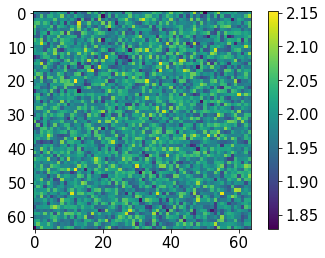

In [151]:
plt.imshow(model.omegas)
plt.colorbar() 
plt.show() 

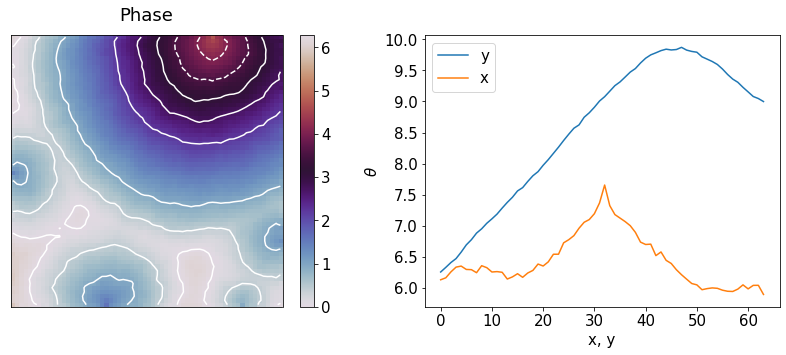

In [156]:
last_slice = model.res[-1].reshape((Lx, Ly))

plt.rcParams.update({
    "font.size": 15,
})

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

im = axes[0].imshow(last_slice % (2*np.pi), vmin=0, vmax=2*np.pi, cmap='twilight')
plt.colorbar(im, ax=axes[0])
im = axes[0].contour(np.sin(last_slice), levels=4, colors='white')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title(r'Phase', y=1.03)


y_slice = last_slice[10]
shift(y_slice)
x_slice = last_slice[:, 0]
shift(x_slice)

axes[1].plot(y_slice, label='y')
axes[1].plot(x_slice, label='x')
axes[1].set_xlabel('x, y')
axes[1].legend()
axes[1].set_ylabel(r'$\theta$')

plt.savefig('Figures/Kuramoto2D_BC={}_eta={}_sigma={}_g={}.pdf'.format(BC, eta, sigma, g))
plt.show() 

## Make movie of the 2D simulation 

In [157]:
# Reshape the result into 2D shape 
N = 100 # number of frames to use in making the movie 
phase_evolution = model.res.reshape((model.n_frames, model.Lx, model.Ly))
phase_evolution = phase_evolution[-N:]
print(phase_evolution.shape)

# Set up figure plotting 
plt.rc('font', size=25)
fig = plt.figure(figsize=(13, 10))
low, high = 0, 2*np.pi 

# Plot the movie one snapshot at a time 
ims = []

# plt.title(r'$\sigma={}, \epsilon ={}, \eta ={}$'.format(sigma, epsilon, eta))
plt.axis('off')
# cbar = plt.colorbar(im, shrink=0.6)
# cbar.set_ticks([0, 2*np.pi])
# cbar.set_ticklabels([r'0', r'$2\pi$'])
plt.tight_layout()
for i in range(N):
    xy = phase_evolution[i].T % (2*np.pi)
    im = plt.imshow(xy, vmin=low, vmax=high, animated=True, cmap='twilight')
#     im = plt.imshow(xy < np.pi/14, interpolation='None', vmin=0, vmax=1)
    plt.axis('off')
    ims.append([im])
ani = am.ArtistAnimation(fig, ims, interval=100, blit=True)
mywriter = am.FFMpegWriter()
ani.save("movie.mp4", writer=mywriter)
plt.close()


(100, 64, 64)


## Now you will find a .mp4 file in the same folder